# Los Angeles Crime Analysis

Los Angeles is a very vibrant city with a lot of neighborhoods, each with unique character. Some neighborhoods are quiet and cozy, has convenient store locations, while others offer a lot of fun and nightlife activities.

Apart from the vibrance of the city, it has a number of crimes reported each day. We have loaded a dataset which is transcribed from original crime reports that are typed on paper.

# Introduction

Los Angeles is a very vibrant city with a lot of neighborhoods, each with unique character. Some neighborhoods are quiet and cozy, has convenient store locations, while others offer a lot of fun and nightlife activities.

Apart from the vibrance of the city, it has a number of crimes reported each day. We have loaded a dataset  which is transcribed from original crime reports that are typed on paper.

**Column	Description**<br/><br/>
- 'DR_NO'	Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits.<br/><br/>
- 'Date Rptd'	Date reported - MM/DD/YYYY.<br/><br/>
- 'DATE OCC'	Date of occurrence - MM/DD/YYYY.<br/><br/>
- 'TIME OCC'	In 24-hour military time.<br/><br/>
- 'AREA NAME'	The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.<br/><br/>
- 'Crm Cd Desc'	Indicates the crime committed.<br/><br/>
- 'Vict Age'	Victim's age in years.<br/><br/>
- 'Vict Sex'	Victim's sex: F: Female, M: Male, X: Unknown.<br/><br/>
- 'Vict Descent'	Victim's descent:<br/>
A - Other Asian<br/>
B - Black<br/>
C - Chinese<br/>
D - Cambodian<br/>
F - Filipino<br/>
G - Guamanian<br/>
H - Hispanic/Latin/Mexican<br/>
I - American Indian/Alaskan Native<br/>
J - Japanese<br/>
K - Korean<br/>
L - Laotian<br/>
O - Other<br/>
P - Pacific Islander<br/>
S - Samoan<br/>
U - Hawaiian<br/>
V - Vietnamese<br/>
W - White<br/>
X - Unknown<br/>
Z - Asian Indian<br/><br/>
'Weapon Desc'	Description of the weapon used (if applicable).<br/><br/>
'Status Desc'	Crime status.<br/><br/>
'LOCATION'	Street address of the crime.

# Processing our data and pre-processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
crimes = pd.read_csv('crimes.csv', dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [4]:
crimes.columns.tolist()

['DR_NO',
 'Date Rptd',
 'DATE OCC',
 'TIME OCC',
 'AREA NAME',
 'Crm Cd Desc',
 'Vict Age',
 'Vict Sex',
 'Vict Descent',
 'Weapon Desc',
 'Status Desc',
 'LOCATION']

In [8]:
crimes.isna().sum()

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA NAME,0
Crm Cd Desc,0
Vict Age,0
Vict Sex,11
Vict Descent,10
Weapon Desc,112213


In [29]:
crimes.describe()

,DR_NO,Vict Age
count,5.831300e+04,58313.000000
mean,2.251227e+08,38.471524
std,5.001647e+06,14.981786
min,2.103139e+08,2.000000
25%,2.203217e+08,27.000000
50%,2.214154e+08,35.000000
75%,2.303122e+08,48.000000
max,2.318081e+08,99.000000


In [41]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58313 entries, 0 to 185713
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DR_NO         58313 non-null  int64 
 1   Date Rptd     58313 non-null  object
 2   DATE OCC      58313 non-null  object
 3   TIME OCC      58313 non-null  object
 4   AREA NAME     58313 non-null  object
 5   Crm Cd Desc   58313 non-null  object
 6   Vict Age      58313 non-null  int64 
 7   Vict Sex      58309 non-null  object
 8   Vict Descent  58310 non-null  object
 9   Weapon Desc   24405 non-null  object
 10  Status Desc   58313 non-null  object
 11  LOCATION      58313 non-null  object
dtypes: int64(2), object(10)
memory usage: 7.8+ MB


In [43]:
crimes['TIME OCC'] = pd.to_numeric(crimes['TIME OCC'])

In [15]:
# areas = crimes['AREA NAME'].unique().tolist()
# for area in areas:
#   sum = 0
#   for index, row in crimes.iterrows():
#     if row['AREA NAME']==area:
#       sum+=1
#   print(area, sum)
crimes['AREA NAME'].value_counts().sort_values

,count
AREA NAME,
Foothill,5983
Hollenbeck,6193
Harbor,6618
Mission,6990
Devonshire,7411
Northeast,7628
West LA,7911
West Valley,8102
Rampart,8346


We shall consider the top 5 most crime-heavy locations to shift some focus of the LA Police to the more affected areas.

Hence, we keep rows with only the below AREA NAMES:
- Central
- Southwest
- 77th Street
- Pacific
- Hollywood

In [23]:
top_areas = crimes['AREA NAME'].value_counts().sort_values().tail().index.values.tolist()
crimes[crimes['AREA NAME'].isin(top_areas)].shape

(58313, 12)

In [24]:
crimes.shape

(185715, 12)

127402 rows will be reducted after the filtering process

In [25]:
crimes = crimes[crimes['AREA NAME'].isin(top_areas)]

([<matplotlib.patches.Wedge at 0x7c1d2f7fbe50>,
 [Text(0.951346284245675, 0.5522139507943887, 'Hollywood'),
  Text(-0.01721503827388486, 1.0998652837767127, 'Pacific'),
  Text(-1.0181874376526518, 0.41628636995021523, '77th Street'),
  Text(-0.6941856263912529, -0.8532914602360581, 'Southwest'),
  Text(0.7623409616621359, -0.7929919660198645, 'Central')],
 [Text(0.5189161550430954, 0.301207609524212, '16.7%'),
  Text(-0.009390020876664467, 0.5999265184236614, '17.0%'),
  Text(-0.5553749659923555, 0.22706529270011738, '20.1%'),
  Text(-0.3786467053043197, -0.4654317055833043, '20.5%'),
  Text(0.4158223427248014, -0.43254107237447154, '25.6%')])

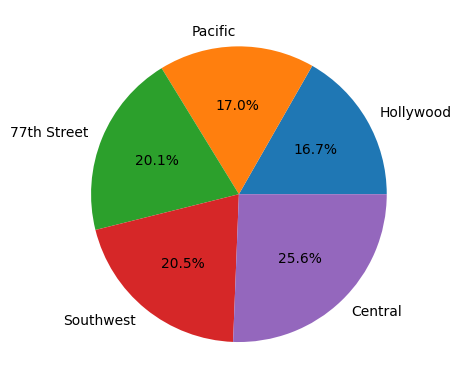

In [105]:
colors = ['coral', 'green', 'blue', 'yellow']
plt.pie(crimes['AREA NAME'].value_counts().sort_values().tail(), labels=top_areas, autopct='%1.1f%%')

# Analyzing Frequency of Crimes depending on Time of Day

First on our analysis checklist is to investigate:
**What is the frequency of crimes occurring during the day versus at night in the crime-heavy areas?**

I pursue this as I assume that it would be more effective for the LA Police Department to deploy more/less patrol at the Day or Night, to increase effectiveness

Since we have already filtered the data, we just need to divide the time of day into Day and Night where:
- Day: TIME OCC > 0600 and TIME OCC < 1730
- Night: TIME OCC < 0600 and TIME OCC > 1730

We will create a **new column 'TIME SEC' which will represent the time of crime as in 'Day' or 'Night'**

In [45]:
crimes['TIME SEC'] = np.where((crimes['TIME OCC'] > 600) & (crimes['TIME OCC'] < 1730), "Day", "Night")
crimes['TIME SEC'].head()

,TIME SEC
0,Day
2,Day
3,Day
5,Day
8,Night


We notice that the indices are quite jumbled due to the filtering of AREA NAME. Hence, let's re-index the data frame

In [52]:
arr = list(range(crimes.shape[0]))
crimes.index = arr

In [53]:
crimes['TIME SEC'].head()

,TIME SEC
0,Day
1,Day
2,Day
3,Day
4,Night


In [82]:
df = pd.DataFrame(columns=["Day", "Night"])

for area in top_areas:
  rows = crimes[crimes['AREA NAME'] == area]
  counts_time_sec = rows['TIME SEC'].value_counts()
  df.loc[len(df)] = counts_time_sec.values[0], counts_time_sec.values[1]

df.index = top_areas
df.head()

,Day,Night
Hollywood,5149,4613
Pacific,5271,4652
77th Street,6186,5553
Southwest,6520,5425
Central,7774,7170


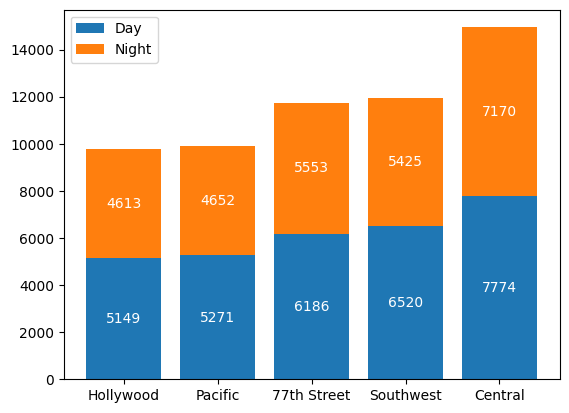

In [89]:
fig, ax = plt.subplots()
bars_day = ax.bar(df.index, df['Day'], label='Day')
bars_night = ax.bar(df.index, df['Night'], bottom=df['Day'], label='Night')

for bar in bars_day:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2,
            f'{height}', ha='center', va='center', color='white')

for bar in bars_night:
    height = bar.get_height()
    bottom = bar.get_y()
    ax.text(bar.get_x() + bar.get_width() / 2, bottom + height / 2,
            f'{height}', ha='center', va='center', color='white')

ax.legend()
plt.show()


In [91]:
df['Deviation (%)'] = abs(df['Day'] - df['Night']) / df['Night'] * 100
df

,Day,Night,Deviation (%)
Hollywood,5149,4613,11.619337
Pacific,5271,4652,13.306105
77th Street,6186,5553,11.399244
Southwest,6520,5425,20.184332
Central,7774,7170,8.423989


Alright, so we observe that the deviation of number of crimes in Day from that of Night, with respect to number of cases in night, is not quite drastic.

Observations:
- The "Central" Area of LA does not show high level of change between crime density during the Day/Night. This means that there should not be much difference in terms of patrol density during Day and Night. However, this approach is two-pronged as we **also know that Central is THE MOST CRIME-HEAVY REGION of Los Angeles** , which means though there should be no difference in terms of numbers, there should still be a great focus of patrol in this area
- Hollywood, Pacific and 77th Street show some significance in terms of variation of crime density during Night and Day, which remains as a vital observation
- Southwest shows a 20% change in crime density during the day and during the night. This requires immediate attention, and the LA Police Department should have more patrol density during Night Shift than Day Shift.

# Relationships with the **Crime Type**

Every crime is unique due to the **nature of crime**, specifically **the type of crime being committed**

Hence, we shall try to investigate:
- How does the **time of crime** correlate with the type of crime?
- Based on our areas, which type of crime has the **highest density?**

For this investigation, we shall only consider the crime types that are considered most violent

In [107]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,TIME SEC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,Day
1,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,Day
2,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,Day
3,221216052,2022-07-07,2020-02-23,1000,77th Street,THEFT OF IDENTITY,28,F,B,NaN,Invest Cont,500 W 75TH ST,Day
4,231207476,2023-02-27,2020-08-15,1,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,Night


In [187]:
crimes['Crm Cd Desc'].unique().tolist()

['THEFT OF IDENTITY',
 'BURGLARY',
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
 'INTIMATE PARTNER - SIMPLE ASSAULT',
 'TRESPASSING',
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
 'BUNCO, GRAND THEFT',
 'BURGLARY FROM VEHICLE',
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
 'VIOLATION OF COURT ORDER',
 'DOCUMENT FORGERY / STOLEN FELONY',
 'PICKPOCKET',
 'BATTERY - SIMPLE ASSAULT',
 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
 'OTHER MISCELLANEOUS CRIME',
 'VEHICLE - ATTEMPT STOLEN',
 'BUNCO, ATTEMPT',
 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
 'UNAUTHORIZED COMPUTER ACCESS',
 'ROBBERY',
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',
 'CONTEMPT OF COU

From our list, it is safe to assume that the below crimes are the most significant and **violent**:
- CRIMINAL HOMICIDE
- BATTERY - SIMPLE ASSAULT
- KIDNAPPING
- ROBBERY
- ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER

We shall filter our data to only consider cases of these crimes

In [188]:
violent_crimes = ['CRIMINAL HOMICIDE', 'BATTERY - SIMPLE ASSAULT', 'KIDNAPPING', 'ROBBERY', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER']
crimes2 = crimes[crimes['Crm Cd Desc'].isin(violent_crimes)]
crimes2['Crm Cd Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT', 'ROBBERY', 'CRIMINAL HOMICIDE',
       'KIDNAPPING', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER'],
      dtype=object)

Now that we have filtered our data, we will visualize the crime density (varying by crime type) for each area

In [189]:
categories = sorted(crimes2['Crm Cd Desc'].unique().tolist())
crimeTypedf = pd.DataFrame(columns=categories)
for area in top_areas:
  rows = crimes2[crimes2['AREA NAME'] == area]
  row_area = []
  for category in categories:
    count = rows['Crm Cd Desc'].value_counts().get(category, 0)
    row_area.append(count)
  crimeTypedf.loc[len(crimeTypedf)] = row_area

crimeTypedf.index = top_areas

In [190]:
crimeTypedf

,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,BATTERY - SIMPLE ASSAULT,CRIMINAL HOMICIDE,KIDNAPPING,ROBBERY
Hollywood,0,1274,16,10,366
Pacific,4,785,6,7,183
77th Street,0,1216,45,15,795
Southwest,24,1104,23,17,457
Central,1,1976,35,14,646


The column names (type of crime) are too lengthy and unfit for when it comes to making visualizations with the data. Hence, below we make a function that shortens any list of strings **to just the first two split elements of each string**, and then apply to **crimeTypedf**

In [191]:
def abbreviate_txt(text_list):
  combined_list = []
  for text in text_list:
    cnt = 0
    wrd_shortened = ""
    for word in text.split():
      if cnt==3:
        break
      wrd_shortened+=word+" "
      cnt+=1
    combined_list.append(wrd_shortened)
  return combined_list

strings = ['ROBBERY', 'BATTERY - SIMPLE ASSAULT',
       'CRIMINAL HOMICIDE', 'KIDNAPPING',
       'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER']

result = abbreviate_txt(strings)
result


['ROBBERY ',
 'BATTERY - SIMPLE ',
 'CRIMINAL HOMICIDE ',
 'KIDNAPPING ',
 'ASSAULT WITH DEADLY ']

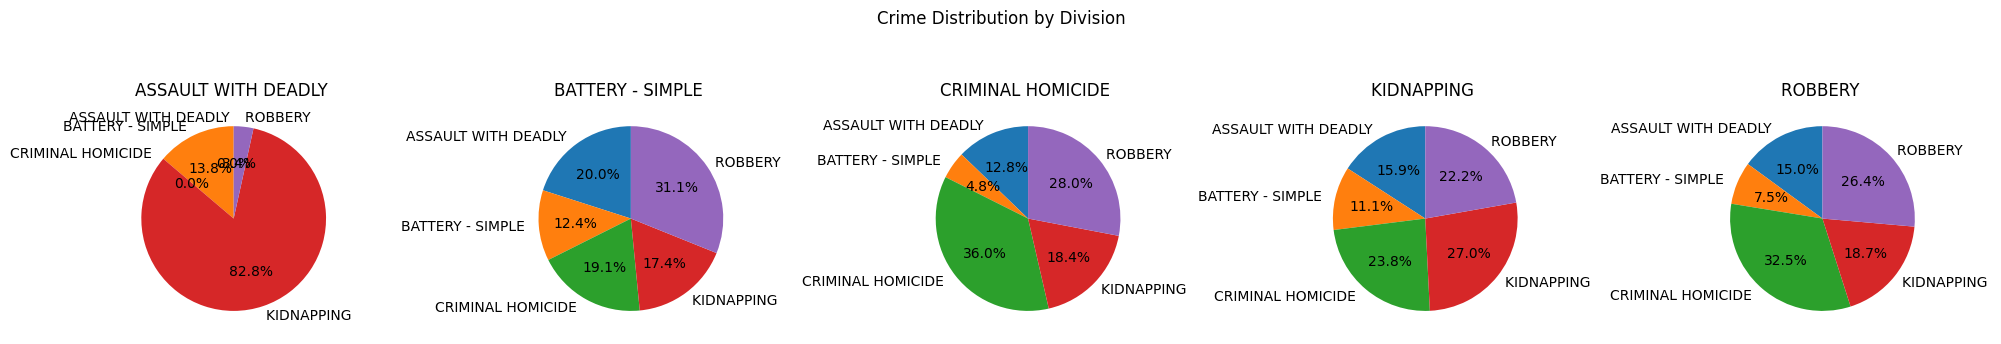

In [192]:
fig, axes = plt.subplots(1, len(crimeTypedf), figsize=(20, 4))
fig.suptitle('Crime Distribution by Division')

abbreviatedColNames = abbreviate_txt(crimeTypedf.columns.tolist())
crimeTypedf.columns = abbreviatedColNames

for i in range(len(crimeTypedf)):
    axes[i].pie(crimeTypedf[abbreviatedColNames[i]], labels=crimeTypedf, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(abbreviatedColNames[i])

plt.tight_layout()
plt.show()

Now we try to analyze how the **time of crime** correlate with the **type of crime**. Essentially, we aim to find, at what exact time, does what type of crime is associated.

Earlier, we did